In [ ]:
import os
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

folder = 'resultTesseract'
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    imgGray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
#     imgGray = cv2.bitwise_not(imgGray)
#     thresh = cv2.adaptiveThreshold(imgGrayBitwise.copy(), 70, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 11)
    thresh = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh, cmap='gray')
    plt.show()
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    if angle < -45:
        print('if', angle)
        angle = -(90 + angle)
    else:
        print('else', angle)
        angle = -angle
        
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    print("[INFO] angle: {:.3f}".format(angle))
    plt.imshow(rotated)
    plt.show()

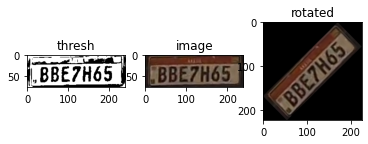

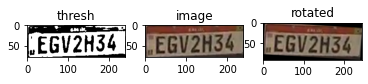

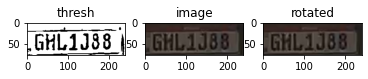

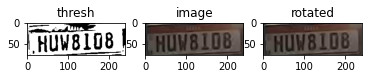

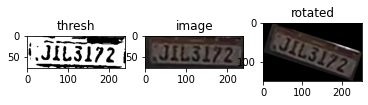

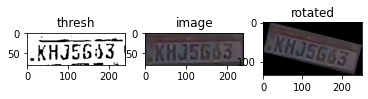

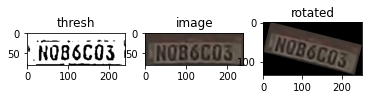

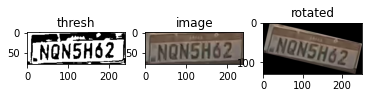

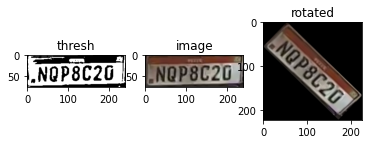

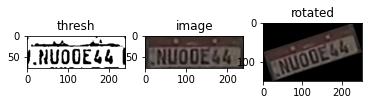

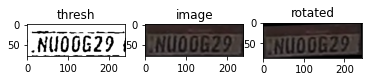

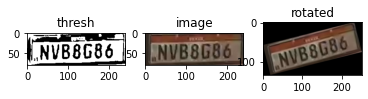

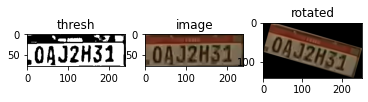

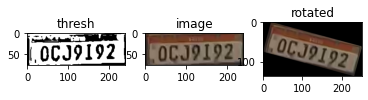

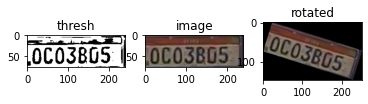

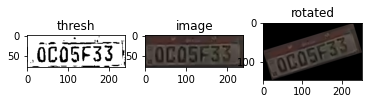

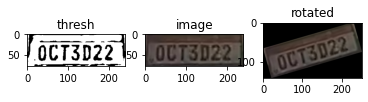

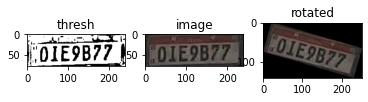

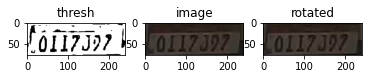

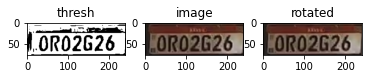

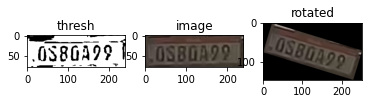

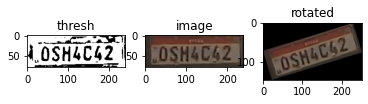

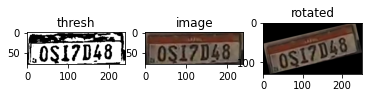

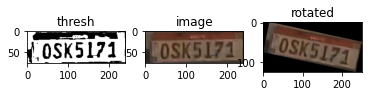

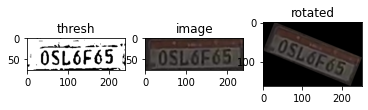

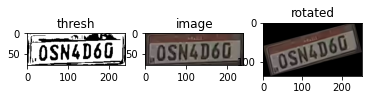

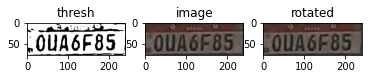

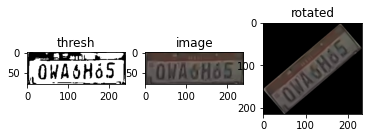

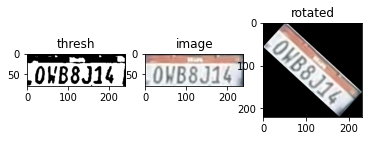

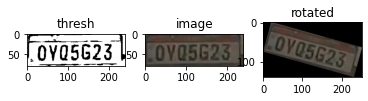

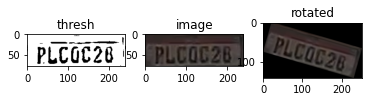

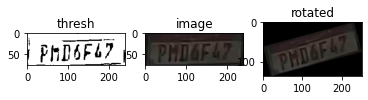

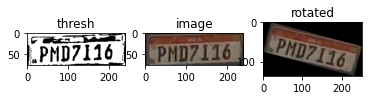

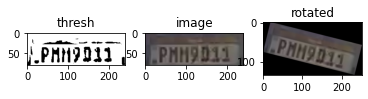

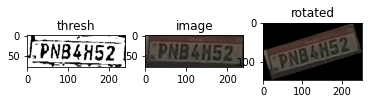

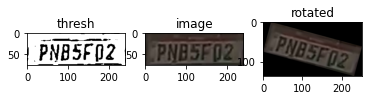

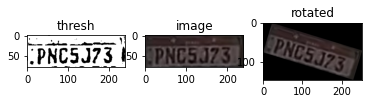

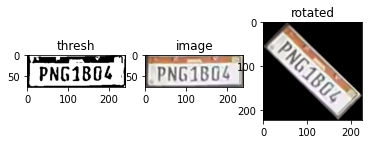

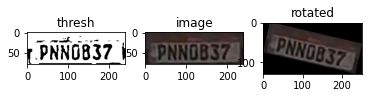

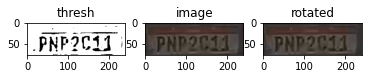

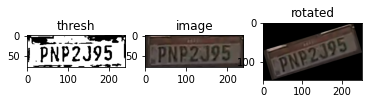

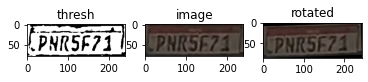

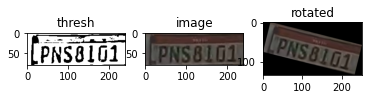

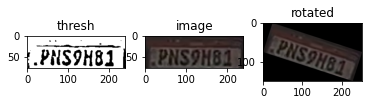

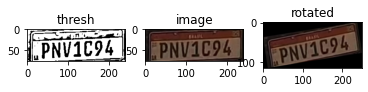

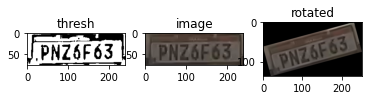

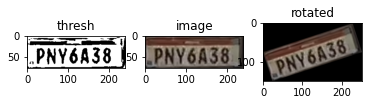

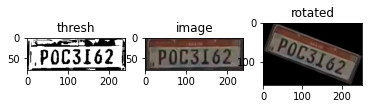

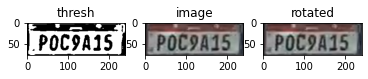

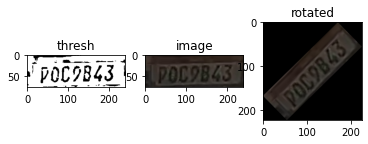

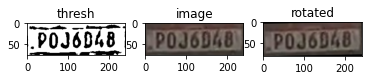

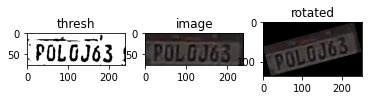

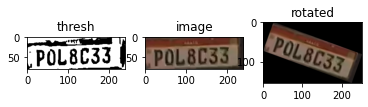

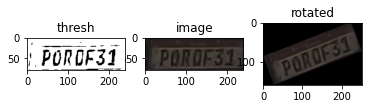

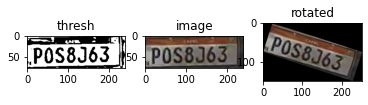

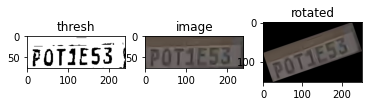

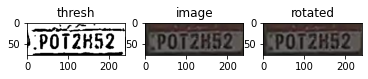

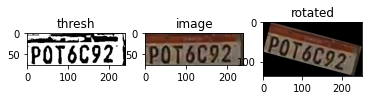

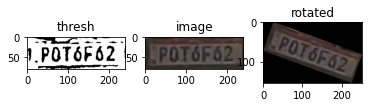

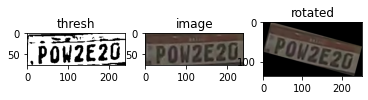

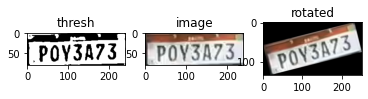

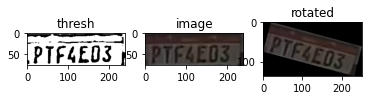

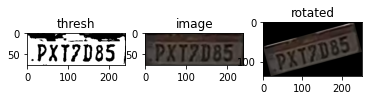

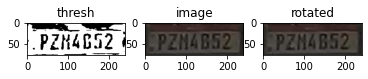

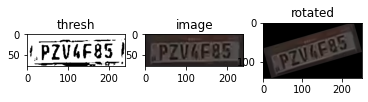

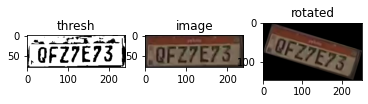

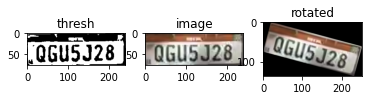

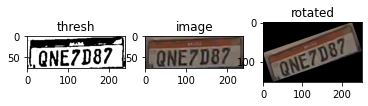

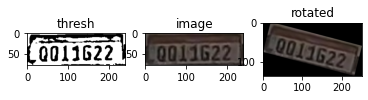

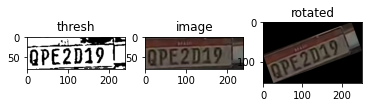

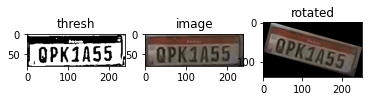

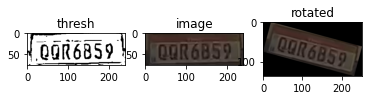

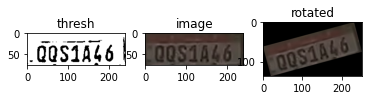

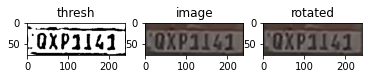

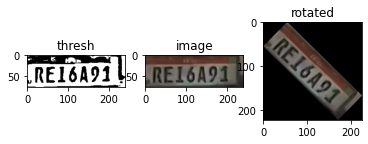

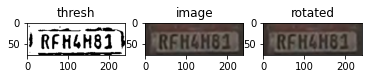

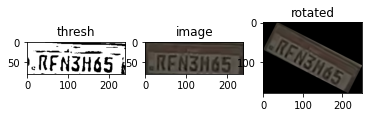

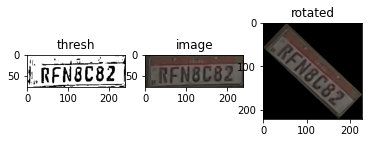

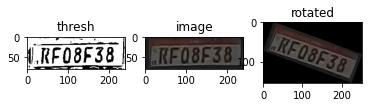

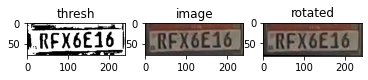

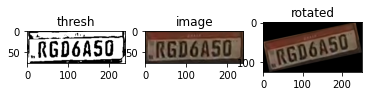

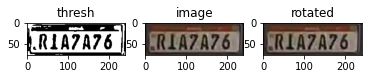

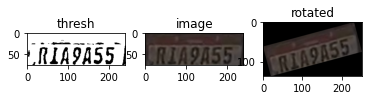

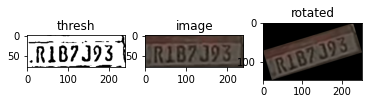

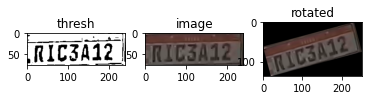

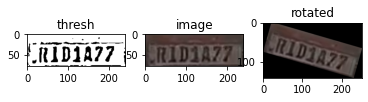

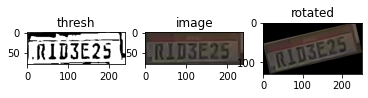

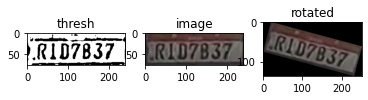

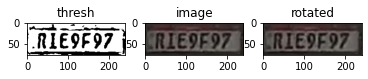

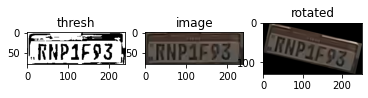

In [26]:
import math
from typing import Tuple, Union
import cv2
import numpy as np
from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

# folder = 'resultTesseract'
folder = 'resultCascadeSpecial'
for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    thresh = cv2.adaptiveThreshold(grayscale, 70, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 11)
    angle = determine_skew(thresh)
    rotated = rotate(image, angle, (0, 0, 0))
    plt.subplot(1,3,1)
    plt.imshow(thresh, cmap="gray"), plt.title('thresh')
    plt.subplot(1,3,2)
    plt.imshow(image), plt.title('image')
    plt.subplot(1,3,3)
    plt.imshow(rotated), plt.title('rotated')
    plt.show()